<a href="https://colab.research.google.com/github/dnhirapara/049_DarshikHirapara/blob/main/lab5/Lab_05_EX1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import numpy as np

# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')
# Targets (apples)
# only for apples
targets = np.array([[56], [81], [119], [22], [103], 
                    [56], [81], [119], [22], [103], 
                    [56], [81], [119], [22], [103]], dtype='float32')

In [4]:
mu = np.mean(inputs, 0)
sigma = np.std(inputs, 0)
#normalizing the input
X = (inputs-mu) / sigma
X = np.hstack((np.ones((targets.size,1)),X))
print(X.shape)

(15, 4)


In [5]:
# Weights and biases
rg = np.random.default_rng(12)
w = rg.random((1, 4))
print(w)

[[0.25082446 0.94675294 0.18932038 0.17929141]]


In [6]:
# MSE loss function
def mse(t1, t2):
    diff = t1 - t2
    return np.sum(diff * diff) / diff.size

In [7]:
# Define the model
def model(x,w):
    return x @ w.T

# Compute error
preds = model(X,w)
cost_initial = mse(preds, targets)
print("before regression cost is : ", cost_initial)

before regression cost is :  6961.124339563164


In [8]:
def gradient_descent(X, y, w, learning_rate, n_iters):
    history = np.zeros((n_iters, 1))
    for i in range(n_iters):
        h = model(X, w)
        diff = h - y
        delta = (learning_rate / targets.size) * (X.T@diff)
        new_w = w - delta.T
        w = new_w
        history[i] = mse(h, y)
    return (history, w)

In [9]:
import matplotlib.pyplot as plt
n_iters = 300
learning_rate = 0.01

initial_cost = mse(model(X, w),targets)

print("intial cost is: ", initial_cost, "\n")

(history, optimal_params) = gradient_descent(X, targets, w, learning_rate, n_iters)

print("optimal parameters are: \n", optimal_params, "\n")

print("final cost is: ", history[-1])

intial cost is:  6961.124339563164 

optimal parameters are: 
 [[72.47538457 -4.56955672 22.26530505 11.97423481]] 

final cost is:  [22.16001858]


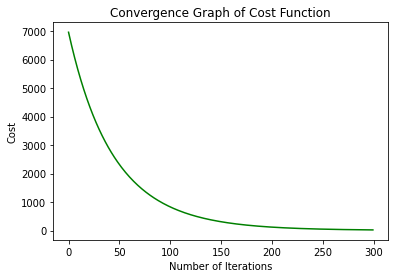

In [10]:
import matplotlib.pyplot as plt


plt.plot(range(len(history)), history, 'g')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [11]:
# Calculate error
preds = model(X, optimal_params)
cost_final = mse(preds, targets)
# Print predictions
print("Prediction:\n",preds)
# Comparing predicted with targets
print("Targets:\n", targets)

Prediction:
 [[ 52.245906  ]
 [ 80.92958084]
 [110.40144414]
 [ 17.92507526]
 [100.87491688]
 [ 52.245906  ]
 [ 80.92958084]
 [110.40144414]
 [ 17.92507526]
 [100.87491688]
 [ 52.245906  ]
 [ 80.92958084]
 [110.40144414]
 [ 17.92507526]
 [100.87491688]]
Targets:
 [[ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]
 [ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]
 [ 56.]
 [ 81.]
 [119.]
 [ 22.]
 [103.]]


In [12]:
print("Cost after linear regression: ", cost_final)
print("Cost reduction : {} %".format(((cost_initial- cost_final) / cost_initial) * 100))

Cost after linear regression:  21.830866683064055
Cost reduction : 99.68638878407917 %
